In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/baseline.csv")
df.head()

,_timestamp,training.top_k_fit.top_2_fit,training.fitness_std,training.fitness_median,training.top_k_fit.top_0_fit,training.top_k_fit.top_1_fit,training.fitness_mean,training.evaluation_time,_step,_runtime,training.run_id,training.generation,training.fitness_1q,training.fitness_3q,solver,environment
0,1.686363e+09,996.966492,213.637680,916.564941,997.247681,997.109802,806.430420,4.763558,10799,5314.008801,9,1079,995.476440,652.509766,cgp,ant
1,1.686375e+09,707.768433,244.062225,575.106873,997.725464,997.361816,609.568909,4.710828,34371,16902.464422,1,3437,707.669861,444.062500,cgp,ant
2,1.686376e+09,998.247742,207.671021,996.902344,998.980408,998.412964,862.021301,4.723768,35888,17639.914737,8,3588,998.010681,755.684326,cgp,ant
3,1.686358e+09,763.903320,303.274658,433.953125,925.560181,811.555847,473.822845,20.466824,3,23.825352,3,0,748.293579,257.749298,cgp,ant
4,1.686369e+09,997.090088,267.850616,816.746582,997.427979,997.220215,747.740356,4.760087,23087,11358.683926,7,2308,997.080505,551.717407,cgp,ant


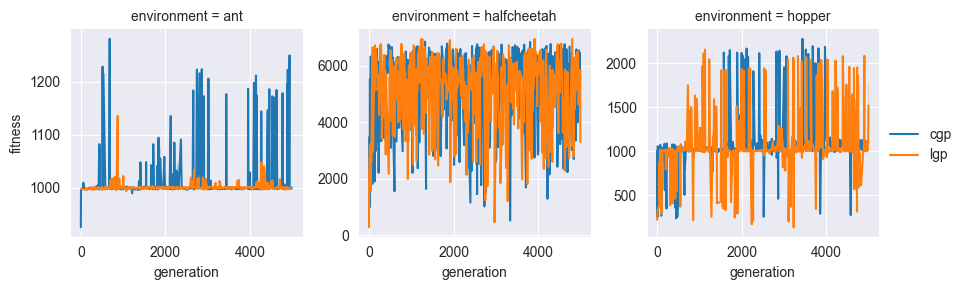

In [4]:
g = sns.FacetGrid(df, col="environment", sharey=False)
g.map_dataframe(sns.lineplot, x="training.generation", y="training.top_k_fit.top_0_fit", hue="solver",
                estimator="median", errorbar=("pi", 50))
g.set_xlabels("generation")
g.set_ylabels("fitness")
g.add_legend()
plt.show()

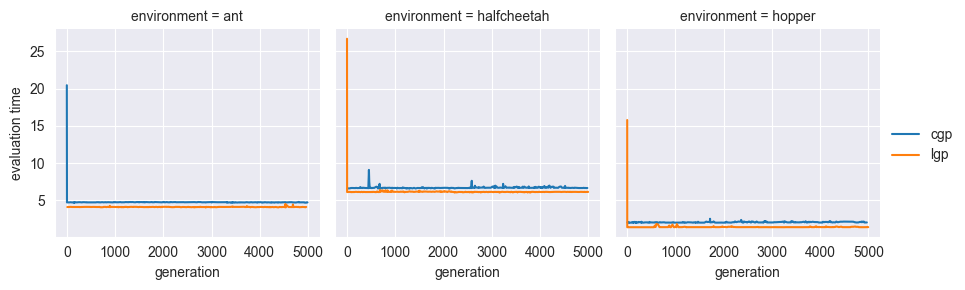

In [5]:
g = sns.FacetGrid(df, col="environment")
g.map_dataframe(sns.lineplot, x="training.generation", y="training.evaluation_time", estimator="median",
                errorbar=("pi", 50), hue="solver")
g.set_xlabels("generation")
g.set_ylabels("evaluation time")
g.add_legend()
plt.show()

In [6]:
graph_sizes = pd.read_csv("data/graph_sizes.csv")
graph_sizes.head()

,seed,generation,graph_size,max_size,environment,solver,run_id
0,1,799,24.0,61,hopper,cgp,9i011yqb
1,5,1699,18.0,61,hopper,cgp,9i011yqb
2,7,3999,17.0,61,hopper,cgp,9i011yqb
3,6,4399,18.0,61,hopper,cgp,9i011yqb
4,3,3199,18.0,61,hopper,cgp,9i011yqb


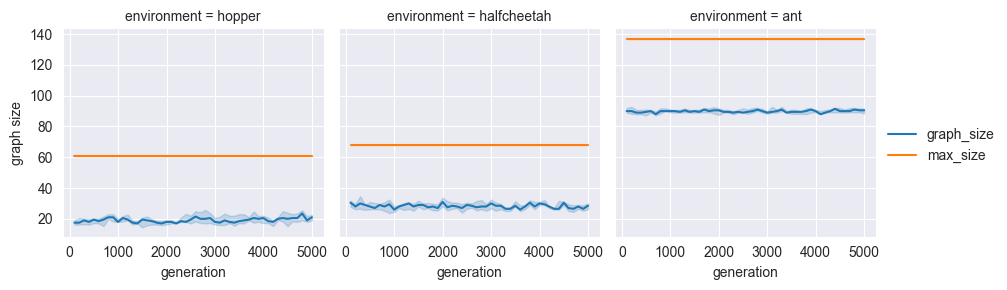

In [10]:
g = sns.FacetGrid(
    pd.melt(graph_sizes, id_vars=["generation", "seed", "environment", "solver"],
            value_vars=["graph_size", "max_size"]),
    col="environment")
g.map_dataframe(sns.lineplot, x="generation", y="value", estimator="median",
                errorbar=("pi", 50), hue="variable")
g.set_xlabels("generation")
g.set_ylabels("graph size")
g.add_legend()
plt.show()